# Notebook info

This notebook is used to extract the images form the Places365 Verification dataset, containing 36500 images of different scenes, as required by the task.

Steps:
*   Load the Tar file;
*   Extract it;
*   Check dataset size;
*   Choose number of images to be used;
*   Create a new dataset containing the number of images we need;

## Additional info and the logic behind our decision :


The **[ Places365 dataset ]( http://places2.csail.mit.edu/download.html )**, belonging to MIT’s Computer Science and Artificial Intelligence Laboratory, is designed following principles of human visual cognition, created specifficaly to train artificial systems for high-level visual understanding tasks, such as scene context, object recognition, action and event prediction, and theory-of-mind inference. In total, Places contains more than 10 million images comprising 400+ unique scene categories. The dataset features 5000 to 30,000 training images per class, consistent with real-world frequencies of occurrence. Using convolutional neural networks (CNN), Places dataset allows learning of deep scene features for various scene recognition tasks, with the goal to establish new state-of-the-art performances on scene-centric benchmarks

We chose this dataset, in combination with a similar number of personal images, with the idea that it contains a fairly large number of scenes matching the requirement of our task. 

Having in mind that the entire dataset contains **10 million images** of different resolution scales, **we are only using the *validation* images of the High-resolution images subset, containing 36500 images.**

Since even that number is a fairly large one, we opted to use only **15%, i.e. 5475 images**, and combine them with a similar number of personal images in order to diversify it and add impromtu scenes, which, of course, gives it a more personal touch.

In [ ]:
#!pip install --upgrade gupload

In [ ]:
import os
import tarfile
import urllib.request as ur
import pandas as pd
from IPython.display import Image
import random 
from pydrive.auth import GoogleAuth
from google.colab import auth
import zipfile

# Link to dataset

In [ ]:
url = "http://data.csail.mit.edu/places/places365/val_large.tar"

# Tar extraction

In [ ]:
file_tmp = ur.urlretrieve( url, filename = None )[ 0 ]
base_name = os.path.basename( url )

file_name, file_extension = os.path.splitext( base_name )
tar = tarfile.open( file_tmp )
extracted = tar.extractall( file_name )

# Checking the dataset size

In [ ]:
# img_df = pd.DataFrame( extracted )
# dataset_size = len( img_df ) - 1
# print( dataset_size )

In [ ]:
list_of_files = os.listdir( "/content/val_large/val_large" )
len( list_of_files )

36500

In [ ]:
percent_of_dataset = 0.15
to_use = int( round( len( list_of_files ) * percent_of_dataset, 0 ) )

print( 
        f" We are goint to use { to_use } images of the entire dataset, which contains { len( list_of_files ) }, or { percent_of_dataset * 100 }%."
        )

 We are goint to use 5475 images of the entire dataset, which contains 36500, or 15.0%.


## Image view

/content/val_large/val_large/Places365_val_00034000.jpg


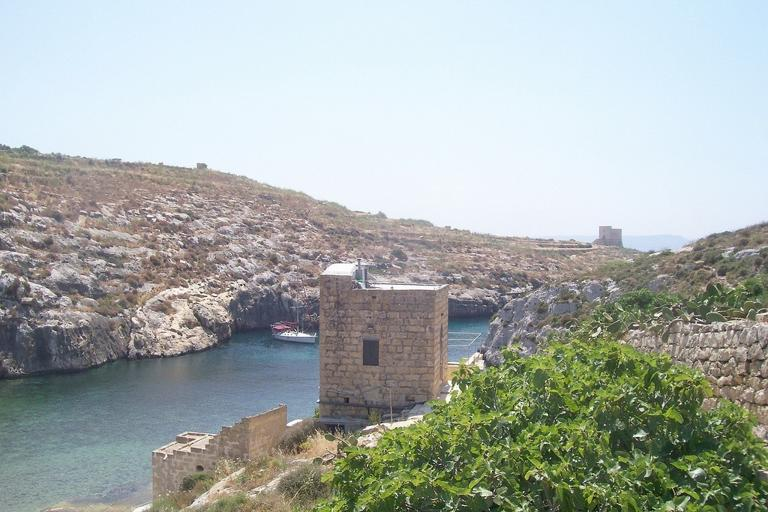

In [ ]:
img_num = "34000"
img = f"/content/val_large/val_large/Places365_val_000{ img_num }.jpg"
print( img )
Image( filename = img ) 

# Randomising the samples

In [ ]:
nums = [ x for x in range( 1, 34500 ) ]
  
randoms_nums = random.sample( nums, to_use )

# Checking uniqueness of samples

In [ ]:
lenght = len( randoms_nums )
print ("The original list is : " + str( lenght ) )
  
flag = 0
  
for i in range( lenght ) : 
        for i1 in range( lenght ) : 
            if i != i1: 
                if randoms_nums[ i ] == randoms_nums[ i1 ] : 
                    flag = 1
  
if(not flag) : 
    print ("List contains all unique elements") 
else :  
    print ("List contains does not contains all unique elements") 

The original list is : 5475
List contains all unique elements


## Renaming the files

In [ ]:
os.chdir( '/content/val_large/val_large' )
print( os.getcwd() ) 
COUNT = 1
  
def increment(): 
    global COUNT 
    COUNT = COUNT + 1

for f in os.listdir(): 
    f_name, f_ext = os.path.splitext( f ) 
    f_name = str( COUNT ) 
    increment() 
  
    new_name = '{}{}'.format( f_name, f_ext ) 
    os.rename( f, new_name )

/content/val_large/val_large


In [ ]:
os.chdir( '/content' ) 

In [ ]:
list_of_files = os.listdir()
len( list_of_files )

36500

/content/val_large/val_large/14050.jpg


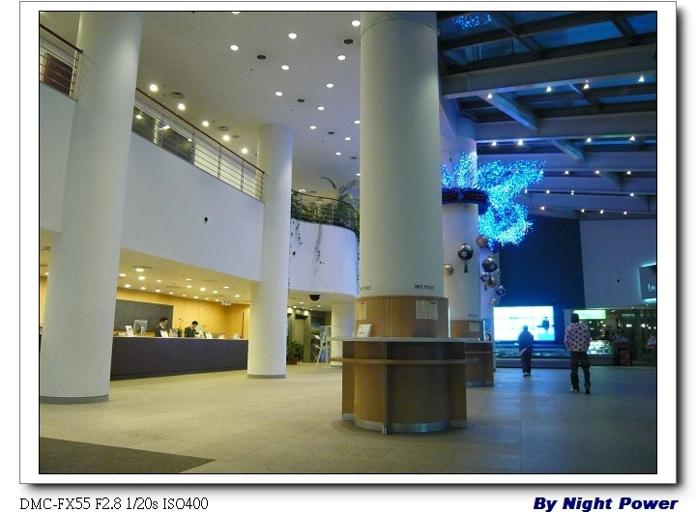

In [ ]:
img_num = "14050"
img = f"/content/val_large/val_large/{ img_num }.jpg"
print( img )
Image( filename = img ) 

## Matching the selection and creating a zip file

In [ ]:
zip_file = zipfile.ZipFile( "Places365_images.zip", "w" )

In [ ]:
os.chdir( '/content/val_large/val_large' )
ext = ".jpg"
for x in randoms_nums :
    file_name = str( x ) + ext
    zip_file.write( file_name )
os.chdir( '/content' ) 

In [ ]:
zip_file.close()

In [ ]:
zip_lenght = zip_file.namelist()
file_size = os.path.getsize( 'Places365_images.zip' ) * 0.000001
print("File Size is :", file_size, "Megabytes")
print( len( zip_lenght ) )

File Size is : 336.189604 Megabytes
5475


In [ ]:
from shutil import copyfile
copyfile( "/content/Places365_images.zip", "/content/drive/MyDrive/Pictures/Places365-Images/Places365_images.zip" )

'/content/drive/MyDrive/Pictures/Places365-Images/Places365_images.zip'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir( "/content/drive/MyDrive/Places365-Images" )
os.listdir()

['Places365_images.zip']

To extract

In [ ]:
import sys
from zipfile import ZipFile

zip_file = os.listdir()[0]

with ZipFile( zip_file, 'r') as zipObj:
   zipObj.extractall( "extracted" )
   print( f"{zip_file} extracted." )

Places365_images.zip extracted.


Rename and move the images to the main direstory

In [ ]:
#os.listdir()

In [ ]:
os.chdir( "/content/drive/MyDrive/Places365-Images/extracted" )
print( os.getcwd() ) 

for f in os.listdir(): 
    f_name, f_ext = os.path.splitext( f ) 
    new_name = 'Places365_{}{}'.format( f_name, f_ext.lower() ) 
    os.rename( f, new_name )
print( "rename completed." )

/content/drive/MyDrive/Places365-Images/extracted
rename completed.


In [ ]:
len( os.listdir() )

5475

In [ ]:
dir = os.listdir()

initial = []

for x in dir :
    asd = x.split( "." )
    initial.append( asd[ 0 ][ 0 ] )
    initial_set = list( set( initial ) )


for y in initial_set :
    count = 0
    for z in initial :
        if z == y:
            count += len( z )
    #print( count )
    print( f"{y}: { count } " )

print( "Total : " + str( len( dir ) ) )

P: 5475 
Total : 5475


In [ ]:
import shutil

os.chdir( "/content/drive/MyDrive/Places365-Images/" )
for x in os.listdir() :
    shutil.move( x, "/content/drive/MyDrive/files_zipped/" )

Zipping the personal files

In [ ]:
os.chdir( '/content/drive/MyDrive/Personal-Images' )

files = os.listdir()

zip_file = zipfile.ZipFile( "/content/drive/MyDrive/files_zipped/Personal_images.zip", "w" )

for x in files :
    zip_file.write( x )
print( "zipping completed" )

zipping completed


In [ ]:
zip_file.close()

Consolidating the images in one folder

In [ ]:
os.chdir( "/content/drive/MyDrive/files_zipped/extracted" )
for x in os.listdir() :
    shutil.move( x, "/content/drive/MyDrive/Images" )
print( "Files moved." )

Files moved.


In [ ]:
os.chdir( "/content/drive/MyDrive/Personal-Images" )
print( os.getcwd() ) 

for f in os.listdir(): 
    f_name, f_ext = os.path.splitext( f ) 
    g_name =  f_name[  :-10  ]
    new_name = '{}{}'.format( g_name, f_ext.lower() ) 
    os.rename( f, new_name )
print( "rename completed." )

/content/drive/MyDrive/Personal-Images
rename completed.


In [ ]:
#os.listdir()

In [ ]:
os.chdir( "/content/drive/MyDrive/Personal-Images" )
for x in os.listdir() :
    shutil.move( x, "/content/drive/MyDrive/Images" )
print( "Files moved." )

Files moved.


In [ ]:
os.chdir( "/content/drive/MyDrive/Images" )
dir = os.listdir()

initial = []

for x in dir :
    asd = x.split( "." )
    initial.append( asd[ 0 ][ 0 ] )
    initial_set = list( set( initial ) )


for y in initial_set :
    count = 0
    for z in initial :
        if z == y:
            count += len( z )
    #print( count )
    print( f"{y}: { count } " )

print( "Total : " + str( len( dir ) ) )

P: 0 
Total : 0


Creating a zip file for the consolidated images:

In [ ]:
os.chdir( '/content/drive/MyDrive/Images' )

files = os.listdir()

zip_file = zipfile.ZipFile( "/content/drive/MyDrive/Images.zip", "w" )

for x in files :
    zip_file.write( x )
print( "zipping completed" )

KeyboardInterrupt: ignored

In [ ]:
os.chdir( '/content/drive/MyDrive/Images/Tina' )
os.listdir()

FileNotFoundError: ignored

In [ ]:
7915 / 4

1978.75

In [ ]:
os.chdir( '/content/drive/MyDrive/Images' )
batch_size = 1979

len( os.listdir()[ 0 : batch_size ] )


1979

In [ ]:
luge = [ "Ivica", "Jasmina", "Dimitri", "Tina" ]

In [ ]:
for l in luge :
    os.mkdir( f'/content/drive/MyDrive/{l}' )

In [ ]:
os.chdir( "/content/drive/MyDrive/Images" )
for x in os.listdir()[ 0 : batch_size ] :
    shutil.move( x, f"/content/drive/MyDrive/{ luge[ 3 ] }" )
print( "Files moved." )

Files moved.


In [ ]:
kolku = 0
for x in luge :
    os.chdir( f"/content/drive/MyDrive/{ x }" )
    kolku += len( os.listdir() )
    print( x, len( os.listdir() ) )
print( kolku )

Ivica 1979
Jasmina 1979
Dimitri 1979
Tina 1978
7915
